# Import Statements


In [1]:
import pandas as pd
import numpy as np
import os
import random
import shutil
from PIL import Image
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from IPython.display import Image
from matplotlib.image import imread
from IPython.display import display, Image as IPImage
import tensorflow as tf
import requests
from bs4 import BeautifulSoup
import matplotlib as plt

from matplotlib.pyplot import imread

import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

import matplotlib.pyplot as plt

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam


2023-12-13 15:14:52.856439: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-13 15:14:52.856517: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-13 15:14:52.951028: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 15:14:55.010657: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-12-13 15:14:55.010808: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

In [2]:
current_directory = os.getcwd()
parent_directory = os.path.abspath(os.path.join(current_directory, os.pardir))
path_images = os.path.join(parent_directory, "raw_data/computer_vision/types/")
path_csv = os.path.join(parent_directory, "raw_data/computer_vision/pokemon.csv")
source_image = os.path.join(parent_directory, "raw_data/computer_vision/pokemon/")
df = pd.read_csv(path_csv)


In [3]:
df = df.fillna('')
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False, drop='first'), ['Type1', 'Type2'])
    ],
    remainder='passthrough'
)
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

result = pipeline.fit_transform(df[['Type1', 'Type2']])
feature_names_out = pipeline.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(['Type1', 'Type2'])
onehot_df = pd.DataFrame(result, columns=feature_names_out)
for col in onehot_df.columns:
    if col.startswith('Type1_'):
        onehot_df.rename(columns={col: col.replace('Type1_', '')}, inplace=True)
    elif col.startswith('Type2_'):
        onehot_df.rename(columns={col: col.replace('Type2_', '')}, inplace=True)
merged_df = onehot_df.groupby(level=0, axis=1).sum()
result = pd.concat([df, merged_df], axis=1)
result = result.drop(['Type1', 'Type2'], axis=1)


/home/groubix/.pyenv/versions/3.10.6/envs/catchemall/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
# result


In [5]:
types_pokemon = result.columns
types_pokemon = types_pokemon.drop('Name')


In [6]:
types_pokemon


Index(['Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting', 'Fire',
       'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object')

In [7]:
def cleaning_identifier(folder):
    for filename in os.listdir(folder):
        if filename.endswith('.Identifier'):
            target_to_remove = os.path.join(folder, filename)
            os.remove(target_to_remove)

# cleaning_identifier(mettre dossier à clean)


In [8]:
def auto_cleaning_identifier(folder):
    for filename in os.listdir(folder):
        tiny_folder = os.path.join(folder, filename)
        print(tiny_folder)
        if os.path.isdir(tiny_folder):
            for tiny_filename in os.listdir(tiny_folder):
                if tiny_filename.endswith('.Identifier'):
                    target_to_remove = os.path.join(tiny_folder, tiny_filename)
                    os.remove(target_to_remove)
        print(os.path.isdir(tiny_folder))
        if filename.endswith('.Identifier'):
            target_to_remove = os.path.join(folder, filename)
            os.remove(target_to_remove)

# auto_cleaning_identifier("/home/groubix/code/mtthibault/catchemall/raw_data/computer_vision/types")


In [9]:
def copy_matching_pokemon_images(source_folder, target_folder):
    # check every type of pokemon
    for type_folder in os.listdir(target_folder):
        type_folder_path = os.path.join(target_folder, type_folder)

        # check file type in lower
        for target_name in os.listdir(type_folder_path):
            target_name_brut = target_name.lower()
            target_parts = target_name_brut.split('.')
            target_name = target_parts[0]

            # look every image on the new data source
            for filename in os.listdir(source_folder):
                source_file_path = os.path.join(source_folder, filename)
                # check source in lower

                source_filename_lower = filename.lower()
                # if the file start with de correct name

                if source_filename_lower.startswith(target_name):

                    # create the target
                    target_file_path = os.path.join(type_folder_path, filename)
                    # copy the image
                    shutil.copy(source_file_path, target_file_path)

source_folder = "/home/groubix/code/mtthibault/catchemall/raw_data/computer_vision/pokemon_sprites"
target_folder = "/home/groubix/code/mtthibault/catchemall/raw_data/computer_vision/types"

# copy_matching_pokemon_images(source_folder, target_folder)


In [10]:
pokemon_dict = {}
for type_pokemon in types_pokemon:
    path_images_type = f"{path_images}{type_pokemon}"
    pokemon_dict[type_pokemon] = ""
    temp_list = []
    for fichier in os.listdir(path_images_type):
        if fichier.endswith(('.png', '.jpg', 'jpeg')):
            temp_list.append(fichier)
            pokemon_dict[type_pokemon]=temp_list

# pokemon_dict


In [11]:
nbr_poke = []
for key, values in pokemon_dict.items():
    taille = len(pokemon_dict[key])
    nbr_poke.append(taille)
# sorted(nbr_poke)


In [12]:
def equalizater_image(target_folder):
    # check every type of pokemon
    for type_folder in os.listdir(target_folder):
        type_folder_path = os.path.join(target_folder, type_folder)
        # look every files on type pokemon
        files = os.listdir(type_folder_path)
        num_files = len(files)
        if num_files > 1376:
            num_files_to_remove = num_files - 779
            files_to_remove = random.sample(files, num_files_to_remove)

            # delet every files >1376
            for file_to_remove in files_to_remove:
                file_path = os.path.join(type_folder_path, file_to_remove)
                os.remove(file_path)

# equalizater_image(target_folder)


In [13]:
nbr_poke = {}
for key, values in pokemon_dict.items():
    nbr_poke[key] = len(pokemon_dict[key])

# nbr_poke


In [14]:
my_picture_path_list = []
count = 0
for key, values in pokemon_dict.items():

    for i in values:
        chemin_image = f"{path_images}{key}/{i}"
        my_picture_path_list.append(chemin_image)
        count += 1

# my_picture_path_list


In [15]:
my_picture_path = {}
count = 0
for key, values in pokemon_dict.items():
    temp_list = []
    for i in values:
        chemin_image = f"{path_images}{key}/{i}"
        temp_list.append(chemin_image)
        my_picture_path[key] = temp_list
        count += 1

# my_picture_path


In [16]:
message = 'python.png'

# check if the message starts with Python
print(message.endswith('.png'))


True


In [17]:
list_shape = []
for i in range(len(my_picture_path_list)):
    x = img_to_array(load_img(my_picture_path_list[i]))/255
    list_shape.append(x.shape)
set(list_shape)


/home/groubix/.pyenv/versions/3.10.6/envs/catchemall/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


{(50, 45, 3),
 (50, 56, 3),
 (60, 59, 3),
 (78, 47, 3),
 (60, 70, 3),
 (62, 36, 3),
 (53, 60, 3),
 (96, 96, 3),
 (76, 70, 3),
 (48, 70, 3),
 (120, 198, 3),
 (32, 48, 3),
 (31, 40, 3),
 (74, 65, 3),
 (73, 74, 3),
 (90, 104, 3),
 (46, 54, 3),
 (75, 89, 3),
 (68, 73, 3),
 (97, 83, 3),
 (54, 46, 3),
 (47, 41, 3),
 (54, 57, 3),
 (64, 82, 3),
 (83, 89, 3),
 (49, 45, 3),
 (84, 97, 3),
 (33, 34, 3),
 (61, 47, 3),
 (62, 55, 3),
 (62, 66, 3),
 (51, 29, 3),
 (56, 35, 3),
 (80, 53, 3),
 (57, 54, 3),
 (57, 43, 3),
 (63, 79, 3),
 (73, 93, 3),
 (105, 82, 3),
 (41, 34, 3),
 (65, 63, 3),
 (70, 58, 3),
 (84, 70, 3),
 (80, 83, 3),
 (70, 69, 3),
 (53, 63, 3),
 (82, 87, 3),
 (72, 42, 3),
 (120, 168, 3),
 (42, 58, 3),
 (69, 102, 3),
 (32, 40, 3),
 (71, 79, 3),
 (54, 87, 3),
 (66, 67, 3),
 (83, 108, 3),
 (76, 92, 3),
 (67, 86, 3),
 (109, 103, 3),
 (61, 55, 3),
 (61, 66, 3),
 (61, 77, 3),
 (45, 55, 3),
 (68, 49, 3),
 (58, 37, 3),
 (56, 54, 3),
 (40, 54, 3),
 (116, 82, 3),
 (82, 49, 3),
 (120, 141, 3),
 (59, 5

In [18]:
len(set(list_shape))


1042

In [19]:
nbr_test = {}
for key, value in nbr_poke.items():
    pourcentage = int(value*0.2)
    nbr_test[key] = pourcentage
nbr_test


{'Bug': 365,
 'Dark': 202,
 'Dragon': 175,
 'Electric': 241,
 'Fairy': 175,
 'Fighting': 231,
 'Fire': 303,
 'Flying': 505,
 'Ghost': 155,
 'Grass': 433,
 'Ground': 360,
 'Ice': 180,
 'Normal': 555,
 'Poison': 404,
 'Psychic': 395,
 'Rock': 302,
 'Steel': 200,
 'Water': 723}

In [20]:
path_images


'/home/groubix/code/mtthibault/catchemall/raw_data/computer_vision/types/'

In [21]:
pourcentage_train = 80

root_folder = os.path.join(parent_directory, "raw_data/computer_vision/")
destination_folder = os.path.join(root_folder, "train_test")
destination_train = os.path.join(destination_folder, "train")
destination_test = os.path.join(destination_folder, "test")

# clear the destination folder if exist
def clear_folder(folder):
    if os.path.exists(folder):
        shutil.rmtree(folder)
    os.makedirs(folder)

# apply the cleaning function
# clear_folder(destination_folder)

def data_train_test_split():
  for type_pokemon, fichiers in my_picture_path.items():
      # shuffle the path
      random.shuffle(fichiers)

      # take the pourcentage of train and round on integer
      split_index = int(len(fichiers) * pourcentage_train / 100)

      # manual slip for train/test
      train_set = fichiers[:split_index]
      test_set = fichiers[split_index:]

      # create train/test folder for every type
      train_folder = f"{type_pokemon}_train"
      test_folder = f"{type_pokemon}_test"
      os.makedirs(train_folder, exist_ok=True)
      os.makedirs(test_folder, exist_ok=True)

      # create a !!COPY!! for every pic on the right folder
      for fichier in train_set:
          shutil.copy(fichier, os.path.join(train_folder, os.path.basename(fichier)))

      for fichier in test_set:
          shutil.copy(fichier, os.path.join(test_folder, os.path.basename(fichier)))

      # move all folder on the right place
      shutil.move(train_folder, os.path.join(destination_train, train_folder))
      shutil.move(test_folder, os.path.join(destination_test, test_folder))

# data_train_test_split()

In [22]:
train_data_dir = parent_directory + "/raw_data/computer_vision/train_test/train/"
test_data_dir = parent_directory + "/raw_data/computer_vision/train_test/test/"
print(train_data_dir)
print(test_data_dir)


/home/groubix/code/mtthibault/catchemall/raw_data/computer_vision/train_test/train/
/home/groubix/code/mtthibault/catchemall/raw_data/computer_vision/train_test/test/


In [23]:
train_ds = image_dataset_from_directory(train_data_dir,
                                        labels="inferred",
                                        label_mode="categorical",
                                        image_size=(120,120),
                                        batch_size=32,
                                        seed=123)

train_ds


Found 23646 files belonging to 18 classes.


2023-12-13 15:15:32.407277: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:03:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-13 15:15:32.407480: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-13 15:15:32.407600: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-12-13 15:15:32.407700: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-12-13 15:15:32.407811: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

<BatchDataset element_spec=(TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 18), dtype=tf.float32, name=None))>

In [24]:


# Split dataset into Train, Validation & Test sets

size = 120   # Resize all images to (size,size)
bs = 64      # Batch size # 32 => 64 pour v3


# Data augmentation on train dataset only
train_data_gen = ImageDataGenerator(width_shift_range = 0.1,
                                    height_shift_range = 0.1,
                                    zoom_range=0.2,
                                    rotation_range=20,  # add roation v3
                                    shear_range=0.1,
                                    brightness_range=[0.8,1.2],
                                    horizontal_flip=True, # Last add for better accuracy for V2
                                    validation_split=0.15,
                                    preprocessing_function=preprocess_input)

train_data = train_data_gen.flow_from_directory(destination_train,
                                                class_mode='categorical',
                                                target_size=(size,size),
                                                color_mode='rgb',
                                                batch_size=bs,
                                                seed=42,
                                                subset='training')

validation_data_gen = ImageDataGenerator(validation_split=0.15,
                                         preprocessing_function=preprocess_input)

validation_data = validation_data_gen.flow_from_directory(destination_train,
                                                          class_mode='categorical',
                                                          target_size=(size,size),
                                                          color_mode='rgb',
                                                          batch_size=bs,
                                                          seed=42,
                                                          subset='validation')

test_data_gen = ImageDataGenerator(validation_split=0.10,
                                   preprocessing_function=preprocess_input)

test_data = test_data_gen.flow_from_directory(destination_train,
                                              class_mode='categorical',
                                              target_size=(size,size),
                                              color_mode='rgb',
                                              subset='validation',
                                              shuffle=False)


Found 20105 images belonging to 18 classes.
Found 3541 images belonging to 18 classes.
Found 2359 images belonging to 18 classes.


In [25]:
# Assign essential variables

shape = train_data.image_shape                 # Shape of train images (height,width,channels)
print(shape)
k = train_data.num_classes                     # Total number of labels or classes
train_samples = train_data.samples             # Total number of images in train set
validation_samples = validation_data.samples   # total number of images in validation set


(120, 120, 3)


In [26]:

# Build the model
def initialize_model_v2_01():

    input_layer = Input(shape=shape)


    basemodel = InceptionV3(weights='imagenet',
                            include_top=False,
                            input_tensor=input_layer,
                            pooling='avg')
    basemodel.trainable = False

    # remove 1 layer and add 3 BatchNormalize
    x = Dense(256, activation='relu')(basemodel.output)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    x = Dense(64, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    output_layer = Dense(k, activation='softmax')(x)

    # create the final model
    model = Model(inputs=input_layer, outputs=output_layer)

    # model compilation
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [27]:
model_4 = initialize_model_v2_01()
model_4.summary()
# Initialize callbacks
stop = EarlyStopping(monitor='val_loss',
                      patience=10,
                      mode='min',
                      restore_best_weights=True)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 59, 59, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 59, 59, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [28]:
# Train the model
ep = 50                      # Number of epochs
spe = train_samples/bs       # Steps per epoch
vs = validation_samples/bs   # Validation steps

r = model_4.fit(train_data,
              validation_data=validation_data,
              steps_per_epoch=spe,
              validation_steps=vs,
              epochs=ep,
              callbacks=[stop])

Epoch 1/50
314/314 [==============================] - 561s 2s/step - loss: 4.0665 - accuracy: 0.0605 - val_loss: 3.0124 - val_accuracy: 0.0768
Epoch 2/50
314/314 [==============================] - 564s 2s/step - loss: 3.7856 - accuracy: 0.0696 - val_loss: 2.9311 - val_accuracy: 0.1039
Epoch 3/50
314/314 [==============================] - 542s 2s/step - loss: 3.5769 - accuracy: 0.0800 - val_loss: 2.8915 - val_accuracy: 0.1178
Epoch 4/50
314/314 [==============================] - 525s 2s/step - loss: 3.4386 - accuracy: 0.0864 - val_loss: 2.8466 - val_accuracy: 0.1384
Epoch 5/50
314/314 [==============================] - 485s 2s/step - loss: 3.3127 - accuracy: 0.0905 - val_loss: 2.8127 - val_accuracy: 0.1381
Epoch 6/50
314/314 [==============================] - 404s 1s/step - loss: 3.2321 - accuracy: 0.0950 - val_loss: 2.7851 - val_accuracy: 0.1590
Epoch 7/50
314/314 [==============================] - 397s 1s/step - loss: 3.1495 - accuracy: 0.1058 - val_loss: 2.7700 - val_accuracy: 0.1522

KeyboardInterrupt: 

In [ ]:
stop ici

In [ ]:
model.evaluate(validation_data)


NameError: name 'model' is not defined

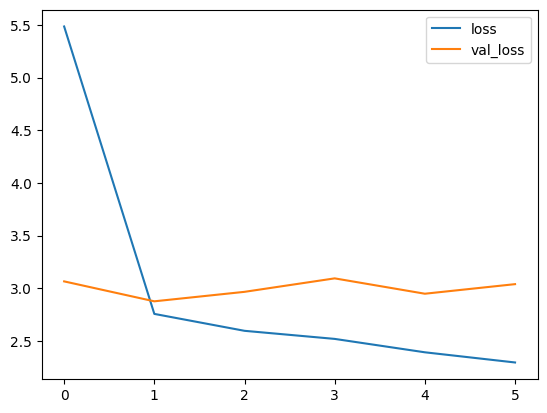

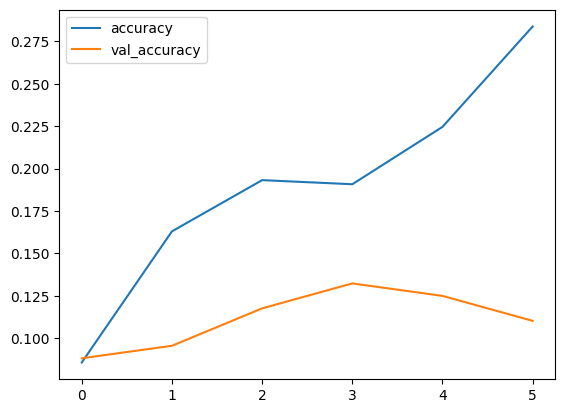

In [ ]:
# Plot training history

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


# Scrapping all pokemon without shiny version


In [ ]:
# Function to scrape individual Pokemon sprite page
def scrape_pokemon_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    pokemon_name = soup.find('h1').text.replace(' sprites', '')

    sprites_data = []
    # Iterate over each table row and extract sprite info
    for row in soup.find_all('tr')[1:]:  # Skipping the header row
        cells = row.find_all('td')
        if len(cells) > 1:
            # Assuming first cell is the generation info
            generation = cells[0].text.strip()
            for cell in cells[1:]:
                img_tag = cell.find('img')
                if img_tag and 'src' in img_tag.attrs:
                    img_url = img_tag['src']
                    sprites_data.append({'name': pokemon_name, 'generation': generation, 'image_url': img_url})
    return sprites_data

# Main URL
base_url = 'https://pokemondb.net'
sprites_url = base_url + '/sprites'

# Get the main sprite page
response = requests.get(sprites_url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find all links to individual Pokemon sprite pages
pokemon_links = [base_url + tag['href'] for tag in soup.select('a.infocard[href]')]

# DataFrame to store all sprites
all_sprites_df = pd.DataFrame()

# Scrape each Pokemon's sprite page
for link in pokemon_links:
    pokemon_sprites = scrape_pokemon_page(link)
    all_sprites_df = all_sprites_df.append(pokemon_sprites, ignore_index=True)

# Display the DataFrame
print(all_sprites_df.head())

/tmp/ipykernel_10693/3693107815.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_sprites_df = all_sprites_df.append(pokemon_sprites, ignore_index=True)
/tmp/ipykernel_10693/3693107815.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_sprites_df = all_sprites_df.append(pokemon_sprites, ignore_index=True)
/tmp/ipykernel_10693/3693107815.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_sprites_df = all_sprites_df.append(pokemon_sprites, ignore_index=True)
/tmp/ipykernel_10693/3693107815.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_sprites_df = all_sprites_df.append(pokemon_sprites, ignore_index=True)
/tmp

        name generation                                          image_url
0  Bulbasaur     Normal  https://img.pokemondb.net/sprites/red-blue/nor...
1  Bulbasaur     Normal  https://img.pokemondb.net/sprites/silver/norma...
2  Bulbasaur     Normal  https://img.pokemondb.net/sprites/ruby-sapphir...
3  Bulbasaur     Normal  https://img.pokemondb.net/sprites/diamond-pear...
4  Bulbasaur     Normal  https://img.pokemondb.net/sprites/black-white/...


/tmp/ipykernel_10693/3693107815.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_sprites_df = all_sprites_df.append(pokemon_sprites, ignore_index=True)


In [ ]:
all_sprites_df['generation'].unique()

array(['Normal', 'Shiny', 'Home', 'Brilliant DiamondShining Pearl',
       'SwordShield', "Let's Go PikachuLet's Go Eevee", 'Bank', 'GO',
       'Omega RubyAlpha Sapphire', 'XY', 'BlackWhite',
       'Black 2White 2BlackWhite Animated', 'HeartGoldSoulSilver',
       'Platinum', 'DiamondPearl', 'Emerald', 'FireRedLeafGreen',
       'RubySapphire', 'Crystal', 'Gold', 'Silver', 'Yellow', 'RedBlue',
       'ScarletViolet', 'Ultra SunUltra MoonSunMoon',
       'Ultra SunUltra Moon', 'Legends: Arceus', 'SunMoon', 'FireRed',
       'LeafGreen', 'Black 2White 2 Animated', 'BlackWhite Animated',
       'Black 2White 2'], dtype=object)

In [ ]:
all_sprites_df = all_sprites_df.loc[all_sprites_df['generation'] != 'Shiny']


,name,generation,image_url
0,Bulbasaur,Normal,https://img.pokemondb.net/sprites/red-blue/nor...
1,Bulbasaur,Normal,https://img.pokemondb.net/sprites/silver/norma...
2,Bulbasaur,Normal,https://img.pokemondb.net/sprites/ruby-sapphir...
3,Bulbasaur,Normal,https://img.pokemondb.net/sprites/diamond-pear...
4,Bulbasaur,Normal,https://img.pokemondb.net/sprites/black-white/...
...,...,...,...
36974,Walking Wake,Home,https://img.pokemondb.net/sprites/home/normal/...
36975,Walking Wake,Home,https://img.pokemondb.net/sprites/home/shiny/1...
36976,Iron Leaves,ScarletViolet,https://img.pokemondb.net/sprites/scarlet-viol...
36977,Iron Leaves,Home,https://img.pokemondb.net/sprites/home/normal/...


In [ ]:
all_sprites_df.loc[all_sprites_df['generation'] != 'Shiny']

In [ ]:
df_without_shiny = all_sprites_df[~all_sprites_df["image_url"].str.contains('shiny')]
df_without_shiny

,name,generation,image_url
0,Bulbasaur,Normal,https://img.pokemondb.net/sprites/red-blue/nor...
1,Bulbasaur,Normal,https://img.pokemondb.net/sprites/silver/norma...
2,Bulbasaur,Normal,https://img.pokemondb.net/sprites/ruby-sapphir...
3,Bulbasaur,Normal,https://img.pokemondb.net/sprites/diamond-pear...
4,Bulbasaur,Normal,https://img.pokemondb.net/sprites/black-white/...
...,...,...,...
36971,Miraidon,Home,https://img.pokemondb.net/sprites/home/normal/...
36973,Walking Wake,ScarletViolet,https://img.pokemondb.net/sprites/scarlet-viol...
36974,Walking Wake,Home,https://img.pokemondb.net/sprites/home/normal/...
36976,Iron Leaves,ScarletViolet,https://img.pokemondb.net/sprites/scarlet-viol...


In [ ]:
import zipfile
from requests.exceptions import ConnectionError

# Function to download an image and save it to a specified folder
def download_image(url, folder_path, file_name):
    try:
        response = requests.get(url)
        response.raise_for_status()
        with open(os.path.join(folder_path, file_name), 'wb') as file:
            file.write(response.content)
    except ConnectionError as e:
        print(f"ConnectionError: {e}. Retrying...")

# Create a directory for the downloaded images
images_folder = 'pokemon_sprites'
os.makedirs(images_folder, exist_ok=True)

# Assuming 'all_sprites_df' is your DataFrame and it has 'name' and 'image_url' columns
for index, row in df_without_shiny.iterrows():
    # Construct a file name for the image
    file_name = f"{row['name']}_{index}.png"
    # Download the image
    download_image(row['image_url'], images_folder, file_name)

# # Create a ZIP file containing all the images
# zip_file_name = 'pokemon_sprites.zip'
# with zipfile.ZipFile(zip_file_name, 'w') as zipf:
#     for root, dirs, files in os.walk(images_folder):
#         for file in files:
#             zipf.write(os.path.join(root, file), file)

# # Delete the original images folder
# import shutil
# shutil.rmtree(images_folder)

# print("Images downloaded and zipped successfully.")

In [ ]:
len(os.listdir('/home/groubix/code/mtthibault/catchemall/notebooks/pokemon_sprites'))

20342